#                                DÉPARTEMENT DE MATHÉMATIQUES ET DE GÉNIE INDUSTRIEL

##                               MTH6312 - MÉTHODES STATISTIQUES D’APPRENTISSAGE

###                                      Projet de Session - Automne 2024

### Thématique: Détection précoce du risque d'AVC

#### Equipe:
  - **Gervais Presley Koyaweda : 2305686**
  - **Jesuton Turibe Zinsou-ply: 2188765**

#### Importation des librairie

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway, chi2_contingency
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold, cross_val_score, learning_curve,cross_val_predict,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report, f1_score, confusion_matrix, make_scorer,roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# **1. Analyse Exploratoire du Dataset**

# **Analyse Exploratoire des Données**

## **1.1 Analyse de la forme des données**
- **Dimensions** :
  - Le dataset contient **5110 observations** et **12 variables** distinctes.
  
- **Types de variables** :
  - **4 variables de type entier**
  - **3 variables de type numérique**
  - **5 variables de type caractère**
  
- **Variable cible (target)** :
  - `stroke` est la variable d’intérêt pour la prédiction. Elle est binaire (1 : AVC, 0 : Pas d’AVC).

- **Analyse des valeurs manquantes** :
  - La colonne **`bmi`** présente **201 valeurs manquantes**, soit **3.93%** du dataset.
  - Toutes les autres variables ne contiennent **aucune valeur manquante**.

---

## **1.2 Analyse de fond des données**

### **1.2.1 Visualisation de la target**
- Seulement **4.87%** des individus ont été diagnostiqués positifs à l'AVC, révélant un **déséquilibre significatif** dans le dataset.

---

### **1.2.2 Description des variables**
- **Variables de type entier** :
  1. `id` : Identifiant unique.
  2. `hypertension` : Indique la présence ou l’absence d’hypertension. **9.7%** des individus sont hypertendus.
  3. `heart_disease` : Indique la présence ou l’absence de maladies cardiaques. **5.4%** des individus ont une maladie cardiaque.
  4. `stroke` : Variable cible indiquant la survenue d'un AVC.

- **Variables de type numérique** :
  1. `age` : Les personnes âgées entre **40 et 60 ans** sont majoritaires.
  2. `avg_glucose_level` : Distribution asymétrique avec un pic entre **50 et 100 mg**.
  3. `bmi` : Distribution normale avec un pic entre **25 et 35**.

- **Variables de type caractère** :
  1. `gender` : Majoritairement constitué de **femmes (58.6%)**.
  2. `ever_married` : **65.6%** des individus n'ont jamais été mariés.
  3. `work_type` : **57%** des individus travaillent dans le secteur privé.
  4. `Residence_type` : **50.8%** vivent en zone urbaine.
  5. `smoking_status` : Divers statuts de tabagisme (never smoked, formerly smoked, smokes).

---

## **1.3 Croisement entre la variable cible et les autres variables**

### **1.3.1 Facteurs internes à l'organisme**
1. **Âge (`age`)** :
   - Les patients avec AVC sont majoritairement âgés de plus de **60 ans**.
   - Les patients sans AVC ont une répartition plus large.

2. **Niveau moyen de glucose (`avg_glucose_level`)** :
   - Les niveaux supérieurs à **150** sont plus fréquents chez les patients avec AVC.

3. **Indice de masse corporelle (`bmi`)** :
   - L’IMC des patients avec AVC est légèrement plus élevé que celui des patients sans AVC.

4. **Hypertension (`hypertension`)** :
   - **26.51%** des patients avec AVC sont hypertendus, contre **8.89%** des patients sans AVC.

5. **Maladies cardiaques (`heart_disease`)** :
   - **18.88%** des patients avec AVC ont des maladies cardiaques, contre **4.71%** des patients sans AVC.

---

### **1.3.2 Facteurs externes**
1. **Type de travail (`work_type`)** :
   - Les individus du secteur privé représentent **59.8%** des cas d'AVC.

2. **Type de résidence (`Residence_type`)** :
   - Les patients en zone urbaine représentent **54.2%** des cas d'AVC.

3. **Statut matrimonial (`ever_married`)** :
   - **88.4%** des patients avec AVC sont mariés ou l’ont été.

4. **Statut de tabagisme (`smoking_status`)** :
   - Les anciens fumeurs représentent **28.1%** des cas d'AVC.

5. **Genre (`gender`)** :
   - Les proportions entre hommes et femmes sont similaires.

---

# **Tests Statistiques**

## **2.1 Tests pour les variables continues**
- **Normalité (Shapiro-Wilk)** :
  - Les variables `age`, `avg_glucose_level` et `bmi` ne suivent pas une distribution normale (p-value < 0.05).

- **Homogénéité des variances (Levene)** :
  - Les variances des groupes `stroke` ne sont pas homogènes pour les trois variables.

- **Différence des moyennes (ANOVA)** :
  - Les moyennes des groupes `stroke` sont significativement différentes pour `age`, `avg_glucose_level` et `bmi`.

---

## **2.2 Tests pour les variables catégorielles**
- **Chi-carré** :
  1. Les variables `hypertension`, `heart_disease`, `ever_married`, `work_type` et `smoking_status` sont significativement liées à `stroke` (p-value < 0.05).
  2. Les variables `residence_type` et `gender` ne montrent pas de relation significative (p-value > 0.05).
  
  ## **Conclusion sur les tests statistiques**
1. Les **facteurs internes** tels que l'âge, l'hypertension, les maladies cardiaques et le glucose sont des indicateurs forts d'AVC.
2. Les **facteurs externes** comme le type de travail et le statut matrimonial ont un lien significatif avec l'AVC.
3. Le genre et le type de résidence semblent moins influents.

---
## **2.3 Vérification de la multicolinéarité**

Le **heatmap de la matrice de corrélation** montre que les variables numériques présentent des corrélations faibles ou modérées entre elles.


### Analyse de la forme des données

In [281]:
#Importation du dataset
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [282]:
data.shape
data=data.drop(columns="id")

In [283]:
# Structure des données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


<Axes: >

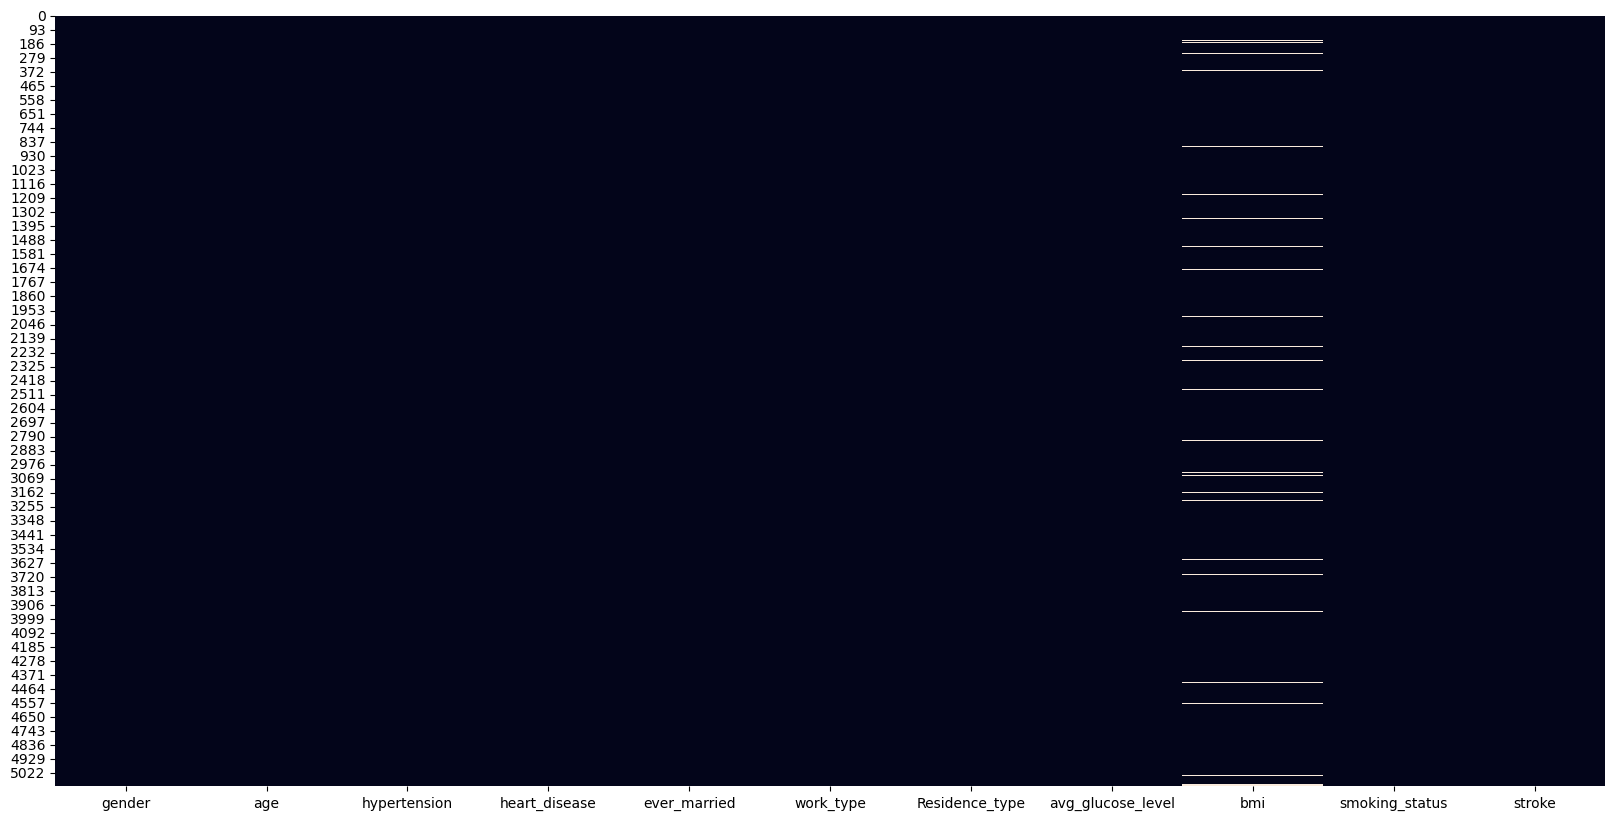

In [288]:
#Observation des valeur manquantes
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False)

In [289]:
print("Proportion des valeurs manquantes")
((data.isna().sum()/data.shape[0])*100).sort_values(ascending=True)

Proportion des valeurs manquantes


gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  3.933464
dtype: float64

### Analyse du Fond des données

In [290]:
#Analyse de la target
print("Repartition de la variable")
data['stroke'].value_counts(normalize=True)*100

Repartition de la variable


stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 640x480 with 0 Axes>

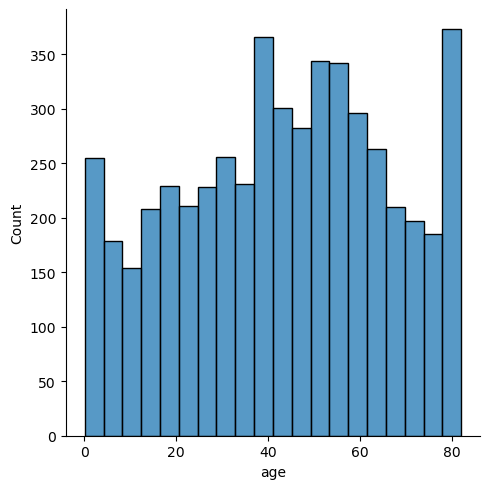

<Figure size 640x480 with 0 Axes>

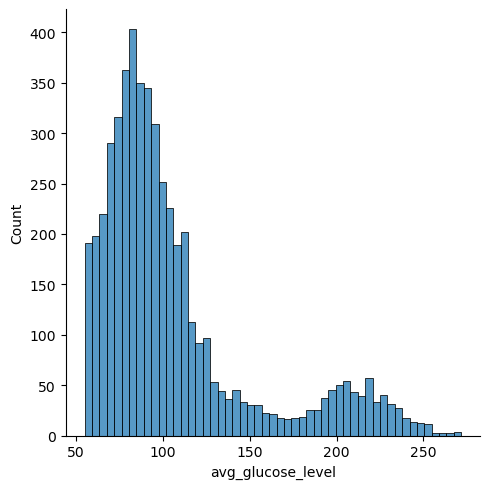

<Figure size 640x480 with 0 Axes>

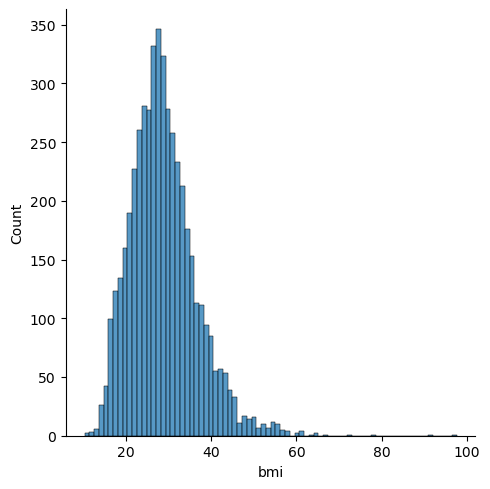

In [291]:
#Histogramme des variables continues
for col in data.select_dtypes("float"):
    plt.figure()
    sns.displot(data[col])

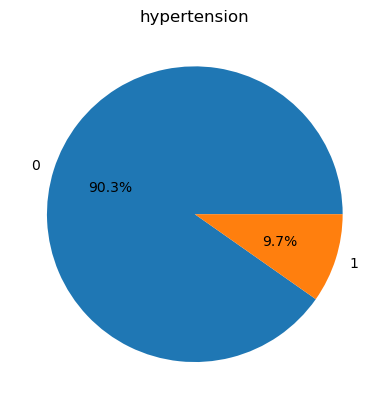

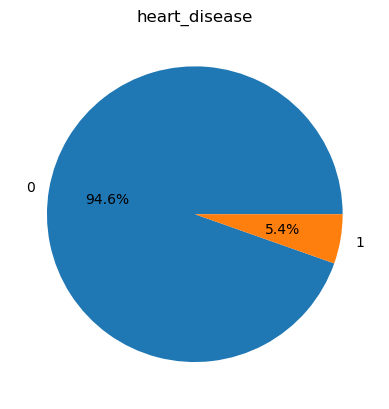

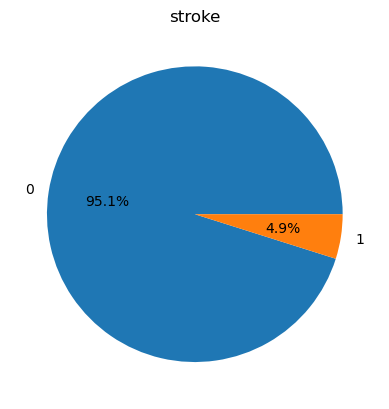

In [292]:
#Variables entier
for col in data.select_dtypes('int64'):
    plt.figure()
    data[col].value_counts().plot.pie(
        labels=data[col].value_counts().index,  # Affiche les noms des catégories
        autopct='%1.1f%%'  # Affiche les pourcentages
    )
    plt.title(col)
    plt.ylabel("")
    plt.show()

In [293]:
#Variables qualitatives
for col in data.select_dtypes('object'):
    print(f'{col :-<50}{data[col].unique()}')


gender--------------------------------------------['Male' 'Female' 'Other']
ever_married--------------------------------------['Yes' 'No']
work_type-----------------------------------------['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------['Urban' 'Rural']
smoking_status------------------------------------['formerly smoked' 'never smoked' 'smokes' 'Unknown']


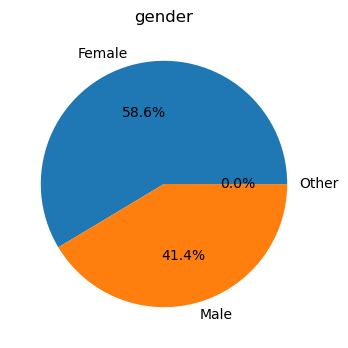

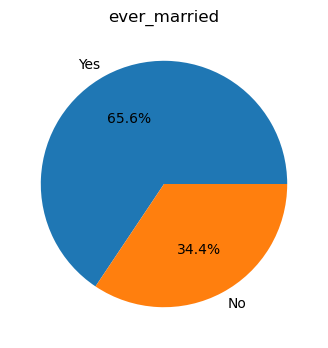

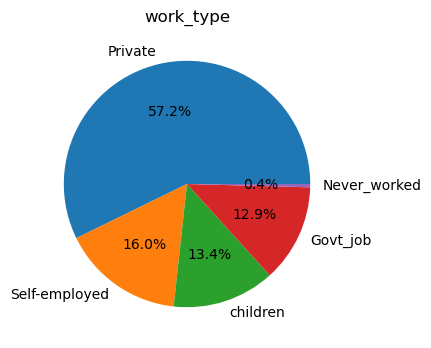

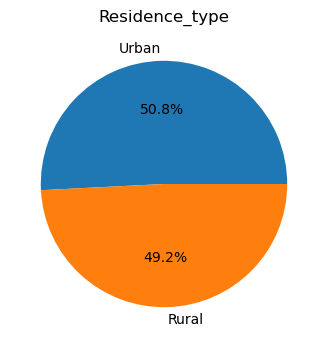

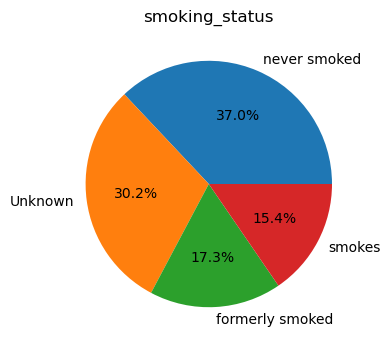

In [294]:
for col in data.select_dtypes("object"):
    plt.figure(figsize=(6, 4))
    data[col].value_counts().plot.pie(labels=data[col].value_counts().index,
                                     autopct='%1.1f%%')
    plt.title(col)
    plt.ylabel("")
    plt.show()

### Relation Target/variable

In [295]:
#Créatio des sous-ensembles positifs et négatifs
positif_data=data[data["stroke"]==1] #Dataset des personnes déclarées positives à l'AVC
negatif_data=data[data["stroke"]==0] #Dataset des personnes declarée négatives à l'AVC

In [296]:
positif_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [297]:
positif_data.shape

(249, 11)

In [298]:
negatif_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [299]:
negatif_data.shape

(4861, 11)

In [300]:
#Les facteurs externes à l'organisme humain
externals_factors=['work_type','Residence_type','ever_married','smoking_status','gender']
#Les facteurs internes à l'organisme humain
internals_factors=['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [301]:
externals_factors_columns=data[externals_factors]
internals_factors_columns=data[internals_factors]

###### Croisement entre la target et les variables de type facteurs internes ('age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi')

C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


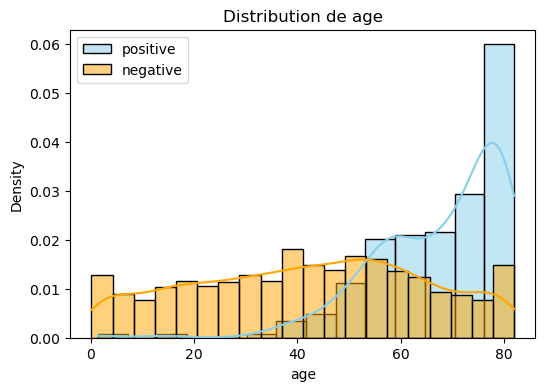

C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


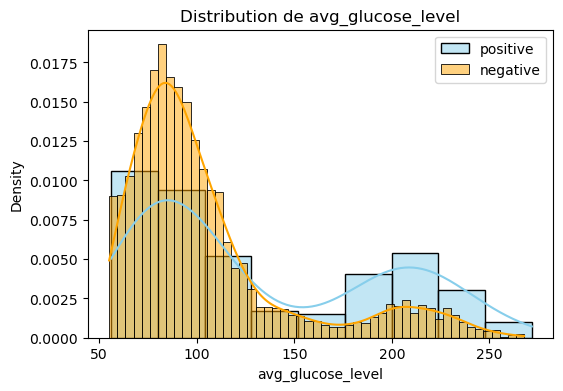

C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gpres\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


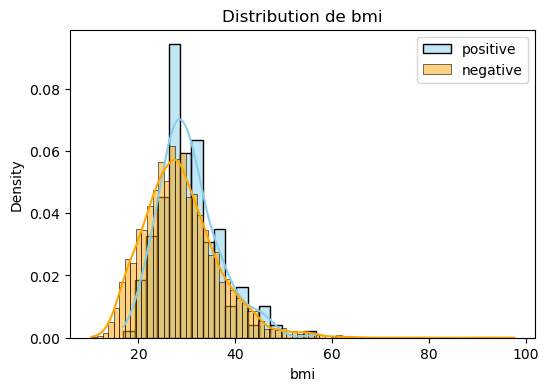

In [302]:
#Target et les facteurs internes pour les variables  de type float
for col in internals_factors_columns.select_dtypes(include='float').columns:
    plt.figure(figsize=(6, 4))
    
    sns.histplot(positif_data[col], color="skyblue", label="positive", kde=True, stat="density", alpha=0.5)
    sns.histplot(negatif_data[col], color="orange", label="negative", kde=True, stat="density", alpha=0.5)
    
    plt.title(f"Distribution de {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    
    plt.show()

In [303]:
#Target et les facteurs internes pour les variables de types categoriel et int
for col in internals_factors_columns.select_dtypes("int64"):
    crosstab_result=pd.crosstab(data["stroke"],data[col], normalize='index')*100
    print(f"\nTableau croisé pour {col} (en pourcentage par ligne):\n")
    print(crosstab_result.round(2))


Tableau croisé pour hypertension (en pourcentage par ligne):

hypertension      0      1
stroke                    
0             91.11   8.89
1             73.49  26.51

Tableau croisé pour heart_disease (en pourcentage par ligne):

heart_disease      0      1
stroke                     
0              95.29   4.71
1              81.12  18.88


###### Croisement entre la target et les variables de type facteurs externes (''work_type','Residence_type','ever_married','smoking_status','gender')

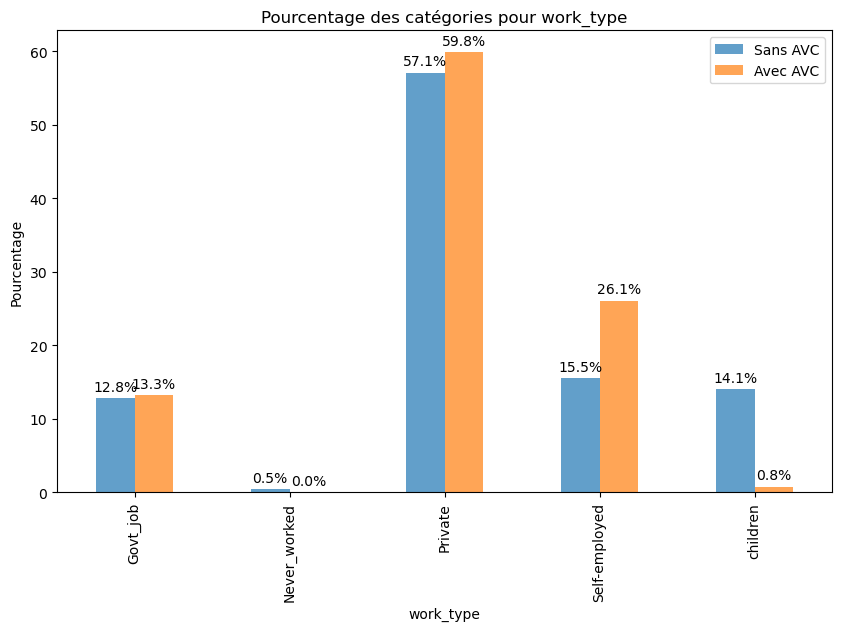

In [304]:
crosstab_result = pd.crosstab(data["stroke"], data["work_type"], normalize="index") * 100
ax = crosstab_result.T.plot(kind='bar', figsize=(10, 6), alpha=0.7)

# Ajout des annotations sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', padding=3)

plt.title("Pourcentage des catégories pour work_type")
plt.xlabel("work_type")
plt.ylabel("Pourcentage")
plt.legend(["Sans AVC", "Avec AVC"])
plt.show()


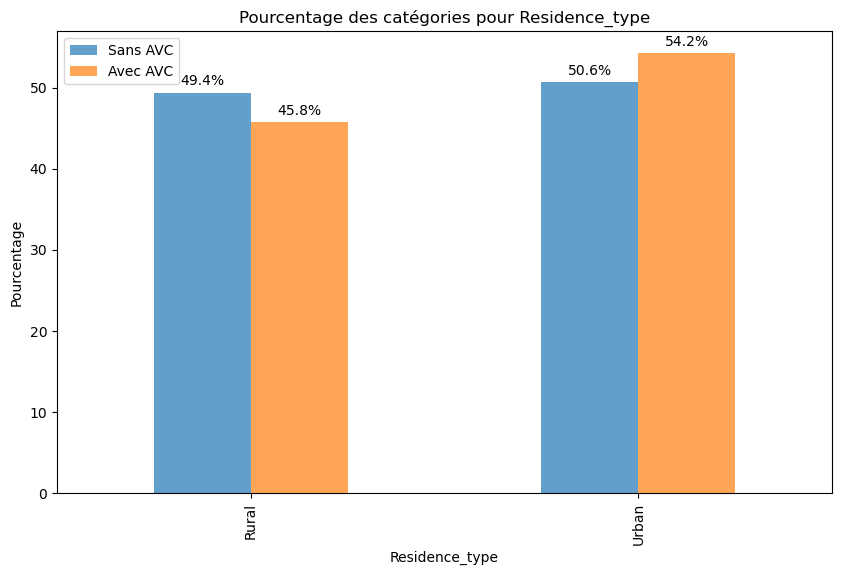

In [305]:
crosstab_result = pd.crosstab(data["stroke"], data["Residence_type"], normalize="index") * 100
ax = crosstab_result.T.plot(kind='bar', figsize=(10, 6), alpha=0.7)

# Ajout des annotations sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', padding=3)

plt.title("Pourcentage des catégories pour Residence_type")
plt.xlabel("Residence_type")
plt.ylabel("Pourcentage")
plt.legend(["Sans AVC", "Avec AVC"])
plt.show()


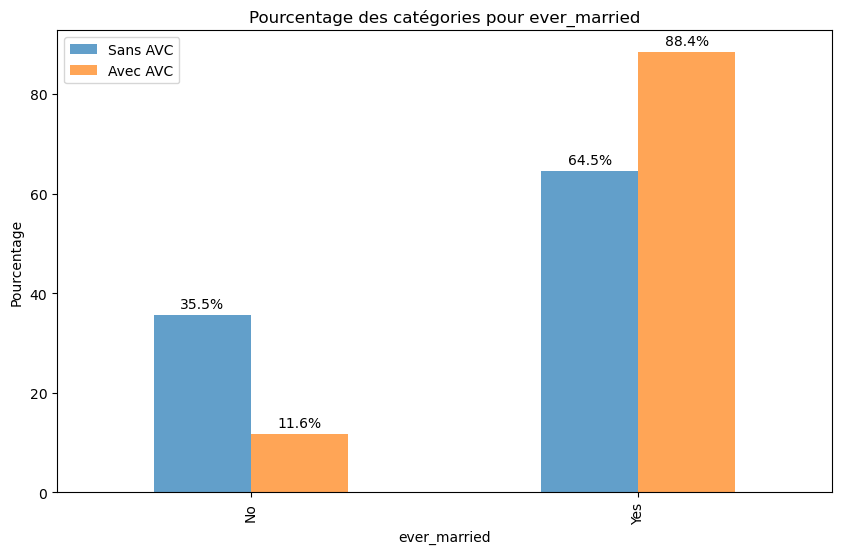

In [306]:
crosstab_result = pd.crosstab(data["stroke"], data["ever_married"], normalize="index") * 100
ax = crosstab_result.T.plot(kind='bar', figsize=(10, 6), alpha=0.7)

# Ajout des annotations sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', padding=3)

plt.title("Pourcentage des catégories pour ever_married")
plt.xlabel("ever_married")
plt.ylabel("Pourcentage")
plt.legend(["Sans AVC", "Avec AVC"])
plt.show()


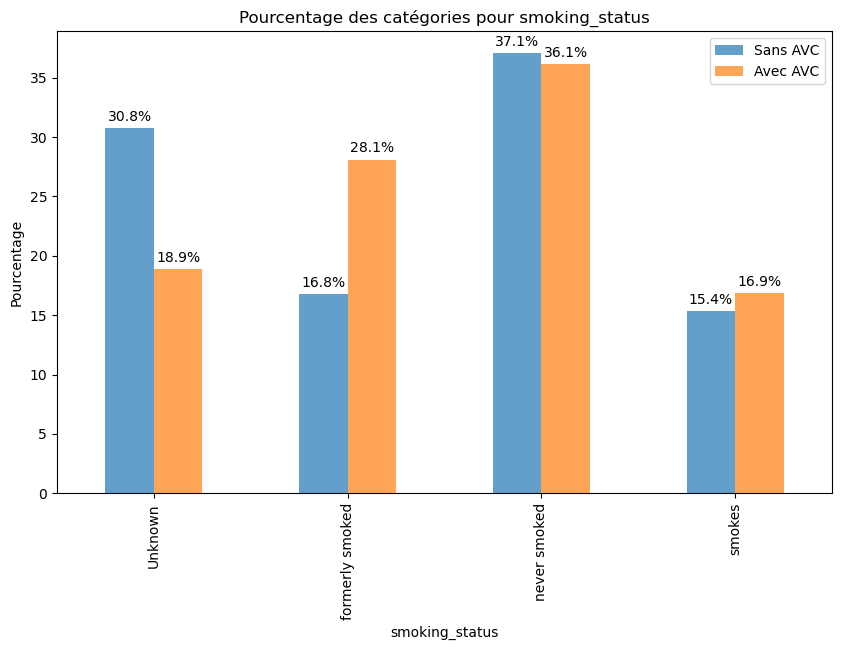

In [307]:
crosstab_result = pd.crosstab(data["stroke"], data["smoking_status"], normalize="index") * 100
ax = crosstab_result.T.plot(kind='bar', figsize=(10, 6), alpha=0.7)

# Ajout des annotations sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', padding=3)

plt.title("Pourcentage des catégories pour smoking_status")
plt.xlabel("smoking_status")
plt.ylabel("Pourcentage")
plt.legend(["Sans AVC", "Avec AVC"])
plt.show()


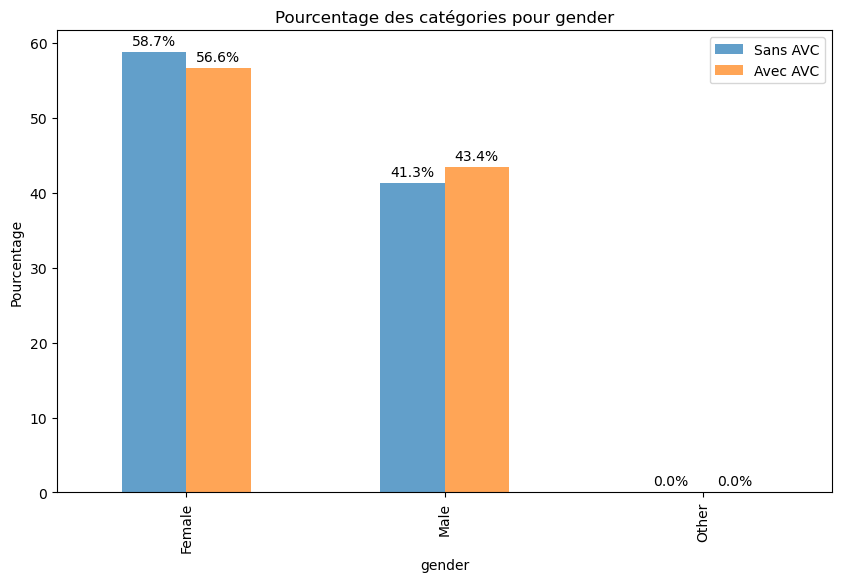

In [308]:
crosstab_result = pd.crosstab(data["stroke"], data["gender"], normalize="index") * 100
ax = crosstab_result.T.plot(kind='bar', figsize=(10, 6), alpha=0.7)

# Ajout des annotations sur les barres
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='edge', padding=3)

plt.title("Pourcentage des catégories pour gender")
plt.xlabel("gender")
plt.ylabel("Pourcentage")
plt.legend(["Sans AVC", "Avec AVC"])
plt.show()


##### Tests statistiques de liaision entre la variables target et les variables explicatives

In [309]:
#selection des variables continues et categorielles
continues_var=['age', 'avg_glucose_level', 'bmi']
categoricals_var=['hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'gender']

### Hypothèses pour les tests statistiques

#### Variables continues
1. **Test de normalité (Shapiro-Wilk)** :
   - **H₀** : Les variables continues suivent une distribution normale.
   - **H₁** : Au moins une des variables continues ne suit pas une distribution normale.

2. **Test de Levene (égalité des variances)** :
   - **H₀** : Les variances des variables continues sont égales entre les groupes (avec et sans AVC).
   - **H₁** : Les variances des variables continues diffèrent entre les groupes.

3. **ANOVA (Analyse de la variance)** :
   - **H₀** : Les moyennes des variables continues sont égales entre les groupes (avec et sans AVC).
   - **H₁** : Au moins une des moyennes des variables continues diffère entre les groupes.

#### Variables catégoriques
1. **Test de Chi-carré** :
   - **H₀** : Il n'y a pas d'association entre les variables catégoriques et la variable cible (AVC).
   - **H₁** : Au moins une des variables catégoriques est associée à la variable cible.


In [310]:
#Test pour les variables continues
for col in continues_var:
    print(f'Target et la variable {col}')
    
    #Test de normalité (nous verifions si la variable a une distribution normale ou pas)
    stat,p=shapiro(data[col].dropna())
    print(f" Test de normalite de Shapiro-Wilk: Statistique = {stat:.4f}, p-value={p:.4f}")
    
    # Test de variance (entre groupes AVC et non-AVC)
    stat, p=levene(data[data["stroke"]==0][col].dropna(),
                  data[data["stroke"]==1][col].dropna())
    
    print(f" Test de Levene d'égalite de la variance : Statistique ={stat:.4f}, p-value={p:.4f}")
    
    # ANOVA pour comparer les moyennes entre groupes
    stat, p=f_oneway(data[data["stroke"]==0][col].dropna(),
                  data[data["stroke"]==1][col].dropna())
    
    print(f"  ANOVA (comparaison des moyennes): Statistique = {stat:.4f}, p-value = {p:.4f}")
    print()

Target et la variable age
 Test de normalite de Shapiro-Wilk: Statistique = 0.9672, p-value=0.0000
 Test de Levene d'égalite de la variance : Statistique =129.7366, p-value=0.0000
  ANOVA (comparaison des moyennes): Statistique = 326.9166, p-value = 0.0000

Target et la variable avg_glucose_level
 Test de normalite de Shapiro-Wilk: Statistique = 0.8059, p-value=0.0000
 Test de Levene d'égalite de la variance : Statistique =94.1085, p-value=0.0000
  ANOVA (comparaison des moyennes): Statistique = 90.5039, p-value = 0.0000

Target et la variable bmi
 Test de normalite de Shapiro-Wilk: Statistique = 0.9535, p-value=0.0000
 Test de Levene d'égalite de la variance : Statistique =10.4249, p-value=0.0013
  ANOVA (comparaison des moyennes): Statistique = 8.8265, p-value = 0.0030



C:\Users\gpres\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [311]:
# Tests pour les variables catégoriques
for col in categoricals_var:
    print(f'Target et la variable {col}')
    
    # Création de la table de contingence
    contingency_table=pd.crosstab(data["stroke"], data[col])
    
    # Test du Chi-carré
    stat, p, dof, expected=chi2_contingency(contingency_table)
    print(f"  Test de Chi-carré: Statistique = {stat:.4f}, p-value = {p:.4f}")
    print()

Target et la variable hypertension
  Test de Chi-carré: Statistique = 81.6054, p-value = 0.0000

Target et la variable heart_disease
  Test de Chi-carré: Statistique = 90.2596, p-value = 0.0000

Target et la variable ever_married
  Test de Chi-carré: Statistique = 58.9239, p-value = 0.0000

Target et la variable work_type
  Test de Chi-carré: Statistique = 49.1635, p-value = 0.0000

Target et la variable Residence_type
  Test de Chi-carré: Statistique = 1.0816, p-value = 0.2983

Target et la variable smoking_status
  Test de Chi-carré: Statistique = 29.1473, p-value = 0.0000

Target et la variable gender
  Test de Chi-carré: Statistique = 0.4726, p-value = 0.7895



#### verification des problèmes de multicolinearité

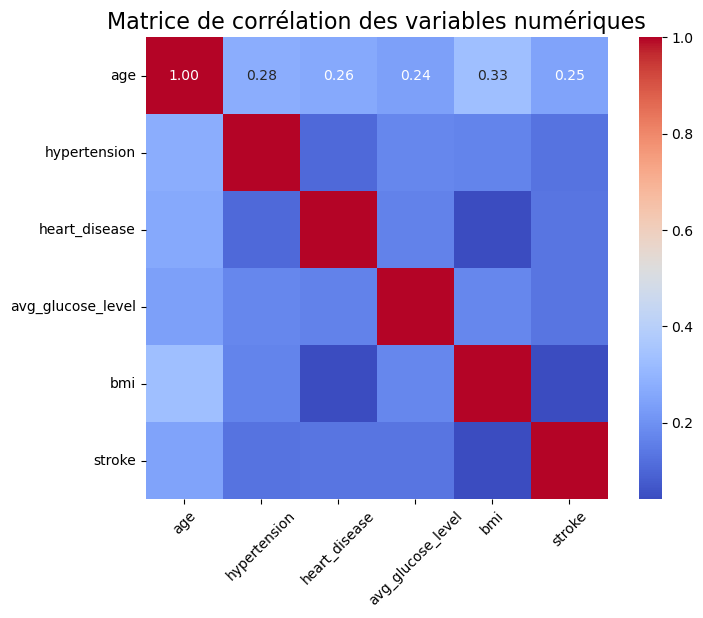

In [312]:
# Calcul des corrélations pour les colonnes numériques
correlation_matrix=data.select_dtypes(include=['float',"int64"]).corr()

#Heatmap des correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",cmap="coolwarm",cbar=True, square=True)
plt.title("Matrice de corrélation des variables numériques", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [313]:
#Selection des variables influantes
finals_var=['age','hypertension', 'heart_disease', 'avg_glucose_level','bmi','work_type','ever_married','smoking_status', 'stroke']

In [314]:
final_data=data[finals_var]
final_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type,ever_married,smoking_status,stroke
0,67.0,0,1,228.69,36.6,Private,Yes,formerly smoked,1
1,61.0,0,0,202.21,NaN,Self-employed,Yes,never smoked,1
2,80.0,0,1,105.92,32.5,Private,Yes,never smoked,1
3,49.0,0,0,171.23,34.4,Private,Yes,smokes,1
4,79.0,1,0,174.12,24.0,Self-employed,Yes,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,Private,Yes,never smoked,0
5106,81.0,0,0,125.20,40.0,Self-employed,Yes,never smoked,0
5107,35.0,0,0,82.99,30.6,Self-employed,Yes,never smoked,0
5108,51.0,0,0,166.29,25.6,Private,Yes,formerly smoked,0


In [315]:
nana_counts=final_data.groupby("stroke")["bmi"].apply(lambda x:x.isna().sum())
print(nana_counts)

stroke
0    161
1     40
Name: bmi, dtype: int64


### Imputation des valeurs manquantes avec la technique de KNN

##### Déterminons d'abord le nombre de voisins idéal pour le KNN avec la technique de validation croisée

In [316]:
# Préparation des données
data_for_imputation=final_data.copy()
columns_to_impute = ['age', 'avg_glucose_level', 'bmi']
data_for_imputation_subset=data_for_imputation[columns_to_impute]

In [317]:
# Filtrage des données avec valeurs non manquantes pour calculer l'erreur de reconstruction
non_missing_data=data_for_imputation_subset[data_for_imputation["bmi"].notnull()]

In [318]:
# Variables et cibles pour la validation croisée
X_non_missing=non_missing_data[['age', 'avg_glucose_level']] # mes Variables auxiliaires
y_non_missing=non_missing_data["bmi"] #ma cible à reconstruire

In [319]:
# Configuration de la validation croisée
kf=KFold(n_splits=5, shuffle=True,random_state=42)
k_values=range(1,21) # Test des valeurs de k de 1 à 20
errors = []

Meilleur k : 19
Erreurs pour chaque k : [87.41954879575478, 67.92875080189592, 59.656495473281794, 56.59699437336377, 53.838410222164086, 52.26573497130014, 51.294547940695736, 50.39715596696837, 49.69437840556656, 49.13992672251392, 48.80469657499664, 48.41226029497659, 48.13439835177339, 47.824553149550084, 47.620677077442664, 47.45031730914521, 47.22408890618882, 47.15457043333406, 46.9824188887484, 47.005448934033815]


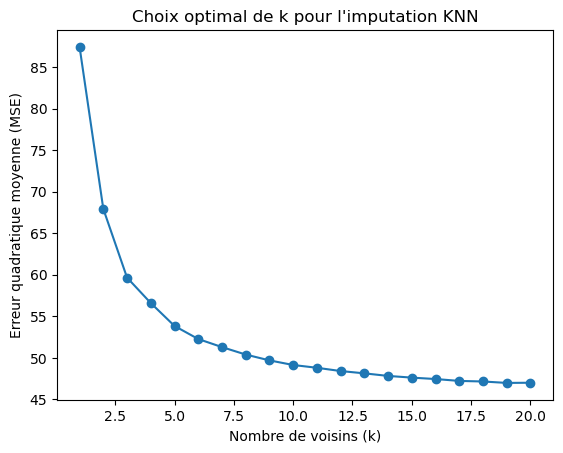

In [320]:
# Validation croisée pour déterminer le meilleur k
for k in k_values:
    imputer = KNNImputer(n_neighbors=k)
    fold_errors = []
    for train_index, test_index in kf.split(X_non_missing):
        # Partition des données
        X_train, X_test = X_non_missing.iloc[train_index], X_non_missing.iloc[test_index]
        y_train, y_test = y_non_missing.iloc[train_index], y_non_missing.iloc[test_index]
        
        # Création d'un ensemble avec des valeurs manquantes artificielles
        train_data = X_train.copy()
        train_data['bmi'] = y_train.values
        test_data = X_test.copy()
        test_data['bmi'] = np.nan  # Introduction des NaN dans les données de test
        
        # Combinaison des données pour l'imputation
        combined_data = pd.concat([train_data, test_data], axis=0)
        
        # Application de KNN Imputer
        imputed_data = imputer.fit_transform(combined_data)
        imputed_bmi = imputed_data[-len(X_test):, -1]  # Extraction des valeurs imputées pour les données de test
        
        # Calcul de l'erreur de reconstruction
        error = mean_squared_error(y_test, imputed_bmi)
        fold_errors.append(error)
    
    # Moyenne des erreurs pour ce k
    errors.append(np.mean(fold_errors))

# Recherche de meilleure valeur de k
best_k = k_values[np.argmin(errors)]

# Résultats
print(f"Meilleur k : {best_k}")
print(f"Erreurs pour chaque k : {errors}")

# Graphique des erreurs
import matplotlib.pyplot as plt

plt.plot(k_values, errors, marker='o')
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Choix optimal de k pour l'imputation KNN")
plt.show()


#### Imputation avec 19-NN

In [321]:
#Nombre de voisins optimal
best_k = 19

# Sélection des colonnes nécessaires pour l'imputation
data_for_imputation = final_data[columns_to_impute]

# Initialisation de 19-NN Imputer
imputer = KNNImputer(n_neighbors=best_k)

# Application de l'imputation
imputed_data = imputer.fit_transform(data_for_imputation)

# Remplacement des valeurs imputées dans le DataFrame original
final_data.loc[:, 'bmi'] = imputed_data[:, 2]

# Vérification des valeurs manquantes après imputation
print("Nombre de NaN après imputation dans 'bmi':", final_data['bmi'].isna().sum())

Nombre de NaN après imputation dans 'bmi': 0


In [322]:
final_data.head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type,ever_married,smoking_status,stroke
0,67.0,0,1,228.69,36.600000,Private,Yes,formerly smoked,1
1,61.0,0,0,202.21,34.768421,Self-employed,Yes,never smoked,1
2,80.0,0,1,105.92,32.500000,Private,Yes,never smoked,1
3,49.0,0,0,171.23,34.400000,Private,Yes,smokes,1
4,79.0,1,0,174.12,24.000000,Self-employed,Yes,never smoked,1
5,81.0,0,0,186.21,29.000000,Private,Yes,formerly smoked,1
6,74.0,1,1,70.09,27.400000,Private,Yes,never smoked,1
7,69.0,0,0,94.39,22.800000,Private,No,never smoked,1
8,59.0,0,0,76.15,29.105263,Private,Yes,Unknown,1
9,78.0,0,0,58.57,24.200000,Private,Yes,Unknown,1


#### Encodage des variables categorielles

In [323]:
#selection des colonnes pour la transformation OneHot Encoding
columns_to_encode=['ever_married', 'work_type', 'smoking_status']

#Encodage
final_data_encoded=pd.get_dummies(final_data, columns=columns_to_encode, drop_first=True).astype(int)

final_data_encoded

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,0,1,0,0
1,61,0,0,202,34,1,1,0,0,1,0,0,1,0
2,80,0,1,105,32,1,1,0,1,0,0,0,1,0
3,49,0,0,171,34,1,1,0,1,0,0,0,0,1
4,79,1,0,174,24,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80,1,0,83,26,0,1,0,1,0,0,0,1,0
5106,81,0,0,125,40,0,1,0,0,1,0,0,1,0
5107,35,0,0,82,30,0,1,0,0,1,0,0,1,0
5108,51,0,0,166,25,0,1,0,1,0,0,1,0,0


## Entrainement du modèle

Le meilleur K pour KNN en classification est : 16


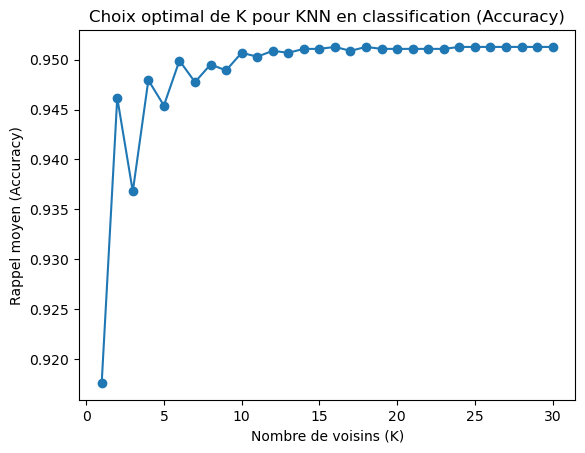

In [324]:
#Determinantion de la valeur de K voisins pour l'entrainement du modele K-NN
X=final_data_encoded.drop(columns=["stroke"])
y=final_data_encoded['stroke']

#initialisation de la validation croisée
kf=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)



# Liste des valeurs de K à tester
k_valeur_model=list(range(1,31))
cv_scores_model=[]

# Parcour des valeurs de K
for k in k_valeur_model:
    knn_model=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')
    cv_scores_model.append(scores.mean())
    
    
#Recherche de K optimal
optimal_k=k_valeur_model[np.argmax(cv_scores_model)]
print(f"Le meilleur K pour KNN en classification est : {optimal_k}")

# Graphe de la fonction perte avec recall
plt.plot(k_valeur_model, cv_scores_model, marker="o")
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Rappel moyen (Accuracy)')
plt.title('Choix optimal de K pour KNN en classification (Accuracy)')
plt.show()

In [325]:
#liste de mes modèles
models={
    "Logistic Regression":LogisticRegression(max_iter=1000, random_state=42),
    "KNN":KNeighborsClassifier(n_neighbors=optimal_k),
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Gradient Boosting":GradientBoostingClassifier(random_state=42)  
}

#Initialisation des métriques d'avaluation
metrics={
    "Accuracy":make_scorer(accuracy_score),
    "Recall":make_scorer(recall_score),
    "F1_score":make_scorer(f1_score)
}


=== Logistic Regression ===
=== Évaluation du modèle : LogisticRegression (Seuil=0.3) ===
Matrice de confusion :
[[3638 1223]
 [  93  156]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      4861
           1       0.11      0.63      0.19       249

    accuracy                           0.74      5110
   macro avg       0.54      0.69      0.52      5110
weighted avg       0.93      0.74      0.81      5110



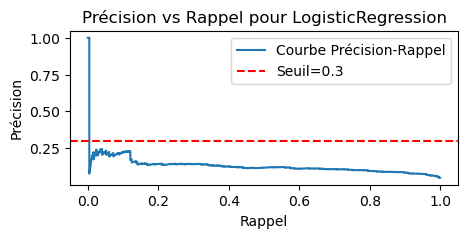

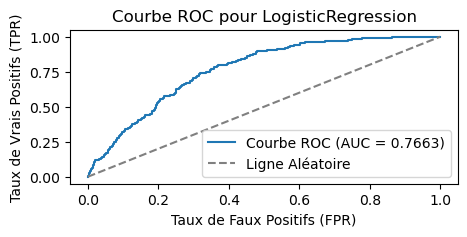

AUC Score : 0.7663


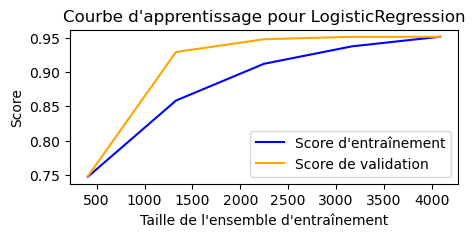


=== KNN ===
=== Évaluation du modèle : KNeighborsClassifier (Seuil=0.3) ===
Matrice de confusion :
[[3183 1678]
 [  48  201]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.65      0.79      4861
           1       0.11      0.81      0.19       249

    accuracy                           0.66      5110
   macro avg       0.55      0.73      0.49      5110
weighted avg       0.94      0.66      0.76      5110



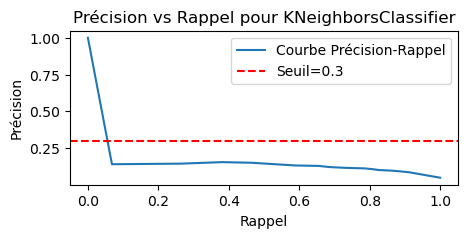

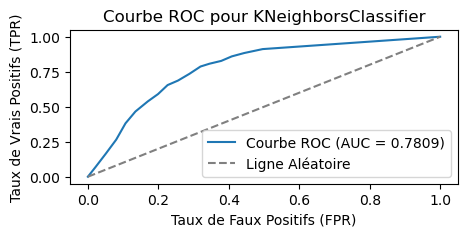

AUC Score : 0.7809


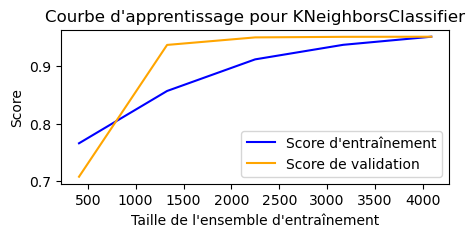


=== Decision Tree ===
=== Évaluation du modèle : DecisionTreeClassifier (Seuil=0.3) ===
Matrice de confusion :
[[4385  476]
 [ 185   64]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      4861
           1       0.12      0.26      0.16       249

    accuracy                           0.87      5110
   macro avg       0.54      0.58      0.55      5110
weighted avg       0.92      0.87      0.89      5110



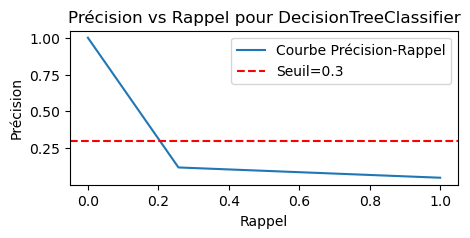

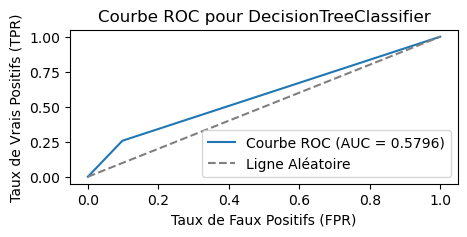

AUC Score : 0.5796


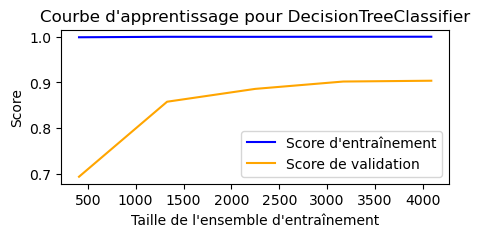


=== Random Forest ===
=== Évaluation du modèle : RandomForestClassifier (Seuil=0.3) ===
Matrice de confusion :
[[4175  686]
 [ 160   89]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      4861
           1       0.11      0.36      0.17       249

    accuracy                           0.83      5110
   macro avg       0.54      0.61      0.54      5110
weighted avg       0.92      0.83      0.87      5110



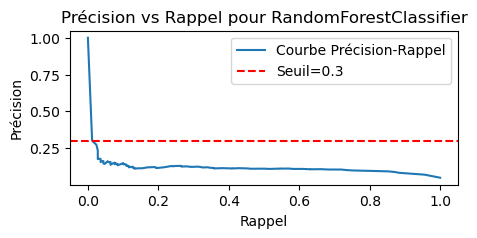

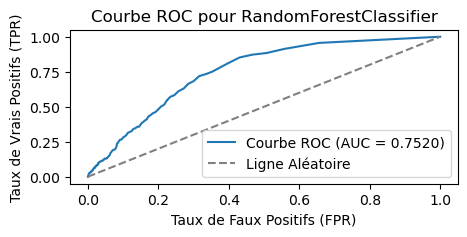

AUC Score : 0.7520


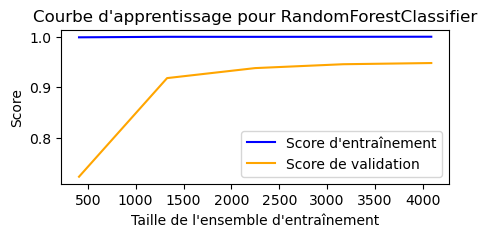


=== Gradient Boosting ===
=== Évaluation du modèle : GradientBoostingClassifier (Seuil=0.3) ===
Matrice de confusion :
[[3804 1057]
 [ 111  138]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.97      0.78      0.87      4861
           1       0.12      0.55      0.19       249

    accuracy                           0.77      5110
   macro avg       0.54      0.67      0.53      5110
weighted avg       0.93      0.77      0.83      5110



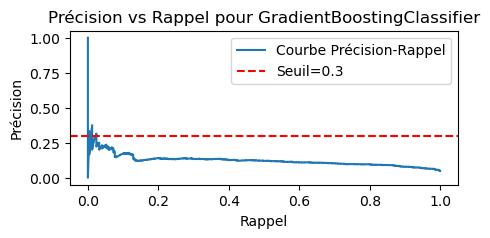

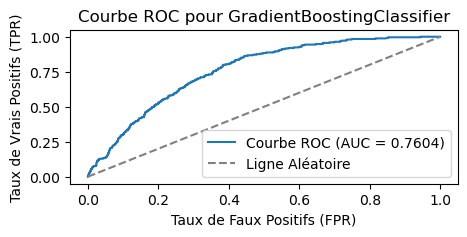

AUC Score : 0.7604


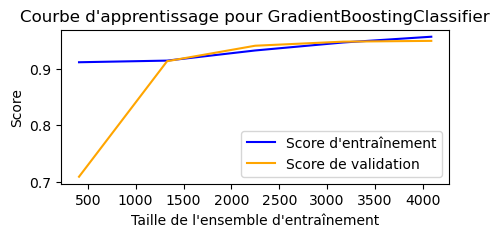

In [326]:
def evaluation_with_threshold_cv(model, X, y, threshold=0.5):
    from sklearn.metrics import roc_curve
    from sklearn.model_selection import learning_curve
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    all_y_true = []
    all_y_pred = []
    all_y_proba = []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Appliquer SMOTE sur l'ensemble d'entraînement
        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

        # Entraîner le modèle
        model.fit(X_train_smote, y_train_smote)

        # Prédire les probabilités
        y_proba = model.predict_proba(X_test)[:, 1]
        y_pred = (y_proba >= threshold).astype(int)

        # Stocker les résultats
        all_y_true.extend(y_test)
        all_y_pred.extend(y_pred)
        all_y_proba.extend(y_proba)

    # Calcul des métriques globales
    cm = confusion_matrix(all_y_true, all_y_pred)
    print(f"=== Évaluation du modèle : {type(model).__name__} (Seuil={threshold}) ===")
    print("Matrice de confusion :")
    print(cm)

    print("\nRapport de classification :")
    print(classification_report(all_y_true, all_y_pred))

    # Courbe précision-rappel
    precision, recall, thresholds = precision_recall_curve(all_y_true, all_y_proba)
    plt.figure(figsize=(5, 2))
    plt.plot(recall, precision, label='Courbe Précision-Rappel')
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Seuil={threshold}')
    plt.xlabel('Rappel')
    plt.ylabel('Précision')
    plt.title(f'Précision vs Rappel pour {type(model).__name__}')
    plt.legend()
    plt.show()

    # Courbe ROC
    fpr, tpr, roc_thresholds = roc_curve(all_y_true, all_y_proba)
    plt.figure(figsize=(5, 2))
    plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc_score(all_y_true, all_y_proba):.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ligne Aléatoire')
    plt.xlabel('Taux de Faux Positifs (FPR)')
    plt.ylabel('Taux de Vrais Positifs (TPR)')
    plt.title(f'Courbe ROC pour {type(model).__name__}')
    plt.legend()
    plt.show()

    # Calcul de l'AUC
    auc_score = roc_auc_score(all_y_true, all_y_proba)
    print(f"AUC Score : {auc_score:.4f}")

    # Courbe d'apprentissage
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=kf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(5, 2))
    plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement", color='blue')
    plt.plot(train_sizes, test_scores_mean, label="Score de validation", color='orange')
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score")
    plt.title(f'Courbe d\'apprentissage pour {type(model).__name__}')
    plt.legend()
    plt.show()

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=16),  # Remplacez 16 par votre `optimal_k`
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Ajuster le seuil pour chaque modèle
threshold = 0.3  # Choisissez un seuil ajusté
for name, model in models.items():
    print(f"\n=== {name} ===")
    evaluation_with_threshold_cv(model, X, y, threshold=threshold)

1. Le **modèle Logistic Regression** montre que, malgré une précision élevée pour la classe majoritaire, il a des difficultés à capturer les vrais positifs de la classe minoritaire, avec un rappel de seulement 63% et un F1-score faible pour cette classe.

2. Le **modèle KNN** montre un meilleur équilibre entre précision et rappel, avec un rappel de 81% pour la classe minoritaire et une AUC de 0.7809, ce qui est la meilleure performance globale parmi les modèles testés.

3. Le **modèle Decision Tree** montre une sous-performance significative, avec un rappel de 26% pour la classe minoritaire et une AUC de 0.5796, ce qui le rend inadapté pour ce problème.

4. Le **modèle Random Forest** montre une robustesse globale avec une AUC de 0.752, mais il est limité par un rappel faible (36%) pour la classe minoritaire.

5. Le **modèle Gradient Boosting** montre de bonnes performances globales avec une AUC de 0.7604 et un rappel de 55% pour la classe minoritaire, mais il reste inférieur au KNN sur le critère de rappel.

En comparant les performances des différents modèles, **nous choisissons le modèle KNN** pour optimisation avec **GridSearchCV**, car il offre le meilleur compromis entre précision, rappel et performance globale (AUC).

## OPTIMISATION

In [327]:
knn_model=KNeighborsClassifier(n_neighbors=16)

In [328]:
# Définition de la grille d'hyperparamètres
param_grid = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [329]:
# Configuration de GridSearchCV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

In [330]:
# Application de SMOTE sur les données d'entraînement
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [331]:
# Entraînement de GridSearchCV
grid_search.fit(X_smote, y_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=16), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

In [332]:
# Meilleures hyperparamètres
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleur score AUC avec 5-fold CV : {grid_search.best_score_:.4f}")

Meilleurs paramètres : {'metric': 'manhattan', 'weights': 'distance'}
Meilleur score AUC avec 5-fold CV : 0.9713


In [333]:
# Évaluation avec validation croisée
best_knn = grid_search.best_estimator_

In [334]:
# Prédictions probabilistes sur les folds de validation
y_proba_cv = cross_val_predict(best_knn, X_smote, y_smote, cv=cv, method='predict_proba')[:, 1]
y_pred_cv = (y_proba_cv >= 0.3).astype(int)  # Utilisation du seuil de probabilité 0.3 au lieu de 0.5

In [335]:
from sklearn.metrics import confusion_matrix

# Affichage des métriques globales
print("\nRapport de classification (5-fold CV) :")
print(classification_report(y_smote, y_pred_cv))
print(f"AUC Score (5-fold CV) : {roc_auc_score(y_smote, y_proba_cv):.4f}")

# Affichage de la matrice de confusion
cm = confusion_matrix(y_smote, y_pred_cv)
print("\nMatrice de confusion :")
print(cm)


Rapport de classification (5-fold CV) :
              precision    recall  f1-score   support

           0       0.99      0.64      0.78      4861
           1       0.74      0.99      0.85      4861

    accuracy                           0.82      9722
   macro avg       0.86      0.82      0.81      9722
weighted avg       0.86      0.82      0.81      9722

AUC Score (5-fold CV) : 0.9712

Matrice de confusion :
[[3131 1730]
 [  29 4832]]


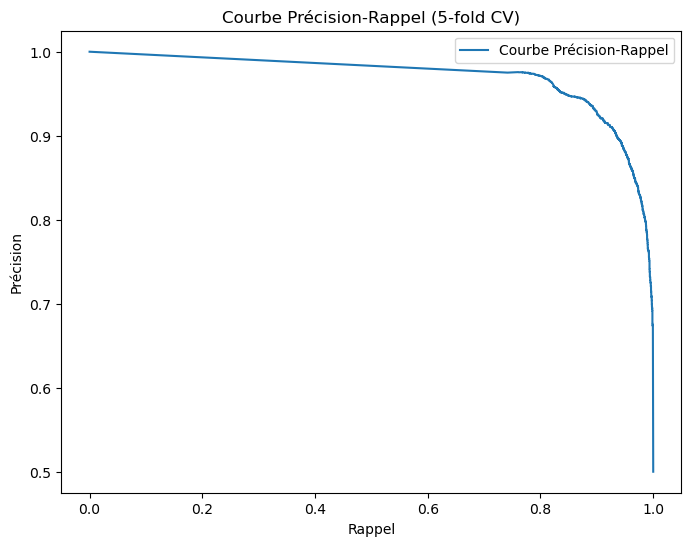

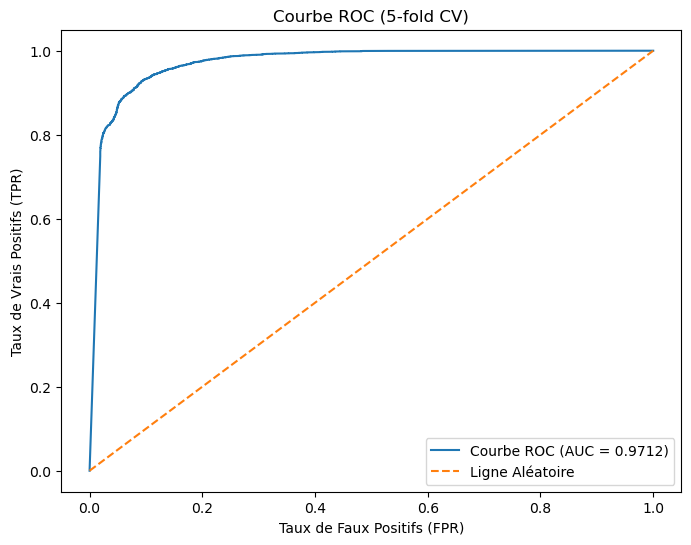

In [336]:
# Les courbes ROC et Précision-Rappel
precision, recall, _ = precision_recall_curve(y_smote, y_proba_cv)
fpr, tpr, _ = roc_curve(y_smote, y_proba_cv)

# Courbe Précision-Rappel
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Courbe Précision-Rappel')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel (5-fold CV)')
plt.legend()
plt.show()

# Courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Courbe ROC (AUC = {roc_auc_score(y_smote, y_proba_cv):.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Ligne Aléatoire')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC (5-fold CV)')
plt.legend()
plt.show()

# Interprétation et Conclusion

Les résultats obtenus avec le modèle **KNN optimisé** indiquent des performances solides sur l'ensemble des métriques évaluées, notamment pour une tâche de classification déséquilibrée.

## Interprétation des Résultats

1. **Précision et Rappel** :
   - La **précision** de 99% pour la classe majoritaire (0) montre que le modèle a bien évité les faux positifs pour cette classe.
   - Le **rappel** de 99% pour la classe minoritaire (1) indique une capacité remarquable à identifier les instances positives, ce qui est crucial dans des problèmes déséquilibrés où les erreurs sur la classe minoritaire peuvent avoir des conséquences graves.

2. **F1-score** :
   - L'équilibre entre précision et rappel, avec un **F1-score** de 85% pour la classe minoritaire, confirme l'efficacité du modèle dans la détection des deux classes.

3. **Courbe ROC** :
   - Avec un AUC de **0.9712**, le modèle démontre un excellent pouvoir discriminant, ce qui suggère qu'il sépare efficacement les classes même lorsque les probabilités varient.

4. **Courbe Précision-Rappel** :
   - Cette courbe montre une forte précision pour un large éventail de valeurs de rappel, ce qui est un indicateur de robustesse dans la gestion des classes déséquilibrées.

5. **Exactitude Globale (Accuracy)** :
   - Une **accuracy** de 82% est satisfaisante compte tenu de la nature déséquilibrée des données et de l'importance accordée à la classe minoritaire.

6. **Matrice de Confusion** :
   - La matrice de confusion montre une très faible proportion de faux négatifs pour la classe minoritaire, ce qui est crucial. En effet, il est préférable de déclarer par erreur un cas comme étant à risque d'AVC (faux positif) plutôt que de manquer un cas positif réel (faux négatif), car les conséquences d'un AVC non détecté peuvent être graves.

## Conclusion

Nous remarquons que l'application de **SMOTE** pour équilibrer les classes, combinée à l'optimisation des hyperparamètres du modèle KNN, a permis d'améliorer significativement les performances du modèle.

Dans le contexte de la prédiction des AVC, où les erreurs de classification peuvent avoir des répercussions majeures sur la santé des individus, le modèle KNN optimisé est particulièrement bien adapté. Sa capacité à minimiser les faux négatifs tout en maintenant une précision élevée pour les cas positifs en fait un outil fiable pour une éventuelle intégration dans un cadre clinique.
